# Expression Matrix Preprocessing

steps includes:
1. removing low expression genes based on TPM
2. selecting focal tissue/organ samples
3. removing housekeeping genes based on Coefficient of variation (CV)

In [1]:
tpm_cutoff = 5
tissue = "stem"
cv_cutoff = 30

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

goi_list = [
    "PtXaTreH.14G131700",
    "PtXaTreH.10G125100",
    "PtXaTreH.06G010600",
    "PtXaTreH.05G120200",
    "PtXaTreH.03G064200",
    "PtXaTreH.02G086600",
]
expression_matrix = pd.read_csv("data/merged_tpm_short_name.csv", index_col=0)


## removing low expression genes based on TPM

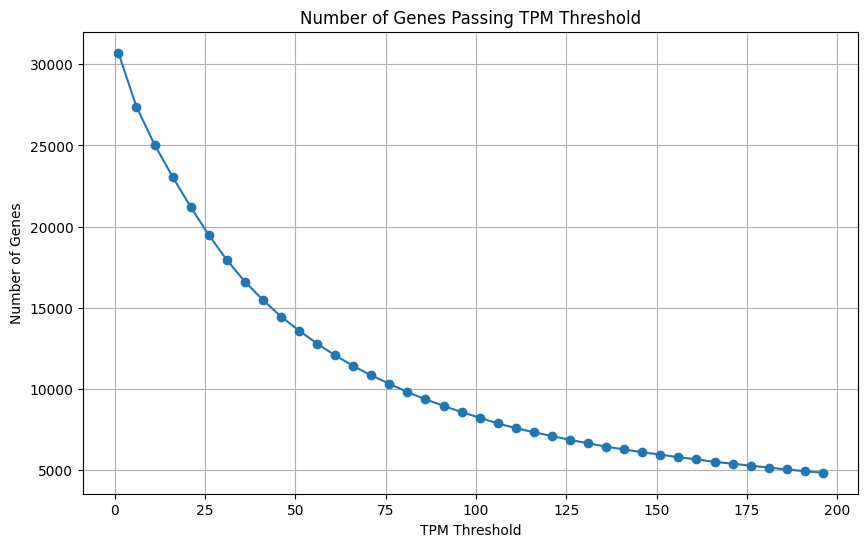

In [3]:
# Initialize lists to store thresholds and corresponding gene counts
thresholds = []
gene_counts = []

# Iterate over different TPM thresholds from 1 to 200 with step 5
for threshold in range(1, 201, 5):
    # Check if any sample has TPM greater than the current threshold for each gene
    has_greater_than_threshold = (expression_matrix > threshold).any(axis=1)
    
    # Count the number of genes that pass the threshold
    num_passed_threshold = has_greater_than_threshold.sum()
    
    # Append the threshold and corresponding gene count to lists
    thresholds.append(threshold)
    gene_counts.append(num_passed_threshold)
    # print(threshold, expression_matrix[has_greater_than_threshold].index.isin(lsg_list).sum())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, gene_counts, marker='o', linestyle='-')
plt.title('Number of Genes Passing TPM Threshold')
plt.xlabel('TPM Threshold')
plt.ylabel('Number of Genes')
plt.grid(True)
plt.show()


In [4]:
# Check if any sample has TPM greater than cutoff for each gene

has_greater_than_cutoff = (expression_matrix > tpm_cutoff).any(axis=1)

# Filter out genes where no sample has TPM greater than the cutoff
tpm_filtered_expression_matrix = expression_matrix.loc[has_greater_than_cutoff]
print(tpm_filtered_expression_matrix.shape)

(27939, 327)


## selecting focal tissue/organ samples

In [5]:
filtered_expression_matrix = tpm_filtered_expression_matrix.loc[:,(tpm_filtered_expression_matrix.columns.str.contains("xylem")) | (tpm_filtered_expression_matrix.columns.str.contains("phloem"))]

filtered_expression_matrix

,1_phloem_control_380CO2__rep1_tpm,1_phloem_control_380CO2__rep3_tpm,1_phloem_control_380CO2__rep2_tpm,1_phloem_control_380CO2_recovered_rep1_tpm,1_phloem_control_380CO2_recovered_rep2_tpm,1_phloem_control_380CO2_recovered_rep3_tpm,1_phloem_control_500CO2__rep1_tpm,1_phloem_control_500CO2__rep2_tpm,1_phloem_control_500CO2__rep3_tpm,1_phloem_control_500CO2_recovered_rep3_tpm,...,12_xylem_Normal wood_0hr_rep4_tpm,12_xylem_Opposite wood_24hr_rep3_tpm,12_xylem_Tension wood_24hr_rep2_tpm,12_xylem_Tension wood_8hr_rep3_tpm,12_xylem_Normal wood_0hr_rep5_tpm,7_xylem_control__rep2_tpm,7_xylem_control__rep1_tpm,7_xylem_mechanical bending__rep2_tpm,7_xylem_mechanical bending__rep3_tpm,7_xylem_mechanical bending__rep1_tpm
target_id,,,,,,,,,,,,,,,,,,,,,
PtXaTreH.T003800,1.8,1.5,1.9,1.6,3.0,1.7,1.3,1.6,2.9,1.5,...,17.2,14.8,22.3,26.8,14.4,2.1,2.6,3.0,4.2,1.0
PtXaTreH.T003900,33.4,57.0,35.8,56.2,42.1,42.6,42.4,33.0,19.9,41.6,...,0.0,0.0,0.0,0.0,0.0,2.8,1.8,0.9,1.6,0.8
PtXaTreH.T004100,2.5,3.5,3.0,3.0,2.2,3.7,3.4,4.0,3.6,3.1,...,2.5,5.4,2.5,4.0,2.8,1.4,3.9,8.2,7.1,3.8
PtXaTreH.T004200,33.4,57.0,35.8,56.2,42.1,42.6,42.4,33.0,19.9,41.6,...,0.0,0.0,0.0,0.0,0.0,2.8,1.8,0.9,1.6,0.8
PtXaTreH.T004300,43.6,73.1,38.6,51.1,43.3,45.6,71.7,73.8,36.6,53.8,...,408.6,1423.8,268.2,390.5,498.0,1.4,1.1,0.9,0.3,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PtXaTreH.02G216700,13.7,12.8,13.4,14.9,16.0,16.8,14.9,15.2,16.6,16.4,...,12.2,11.0,15.1,12.5,10.4,9.1,10.3,15.1,10.0,13.7
PtXaTreH.02G216800,23.3,18.5,21.3,21.6,20.0,21.7,18.4,21.0,20.0,17.9,...,17.2,9.4,14.5,15.4,19.2,14.7,14.3,17.4,21.3,19.7
PtXaTreH.02G216900,37.7,37.1,52.0,35.3,30.1,34.8,36.1,37.4,33.1,35.8,...,55.7,33.8,53.6,53.1,57.7,24.1,27.6,33.2,33.7,38.5


## removing housekeeping genes based on Coefficient of variation (CV)

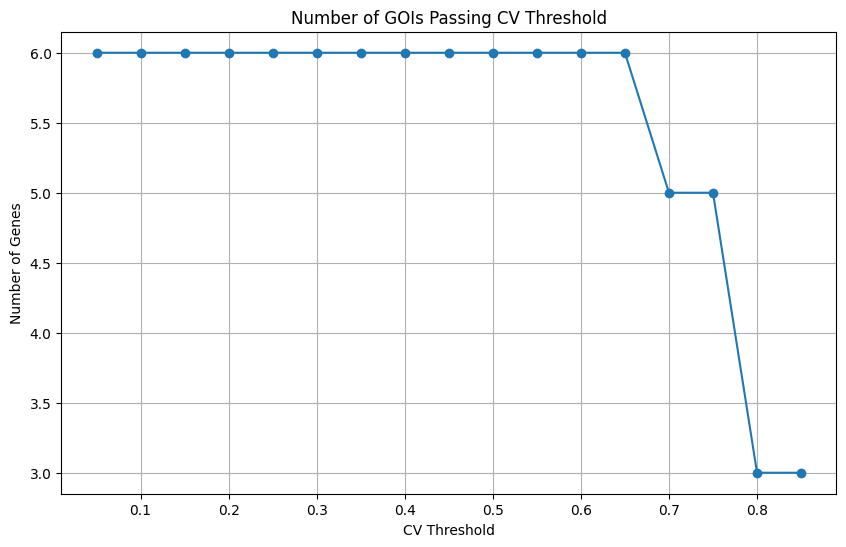

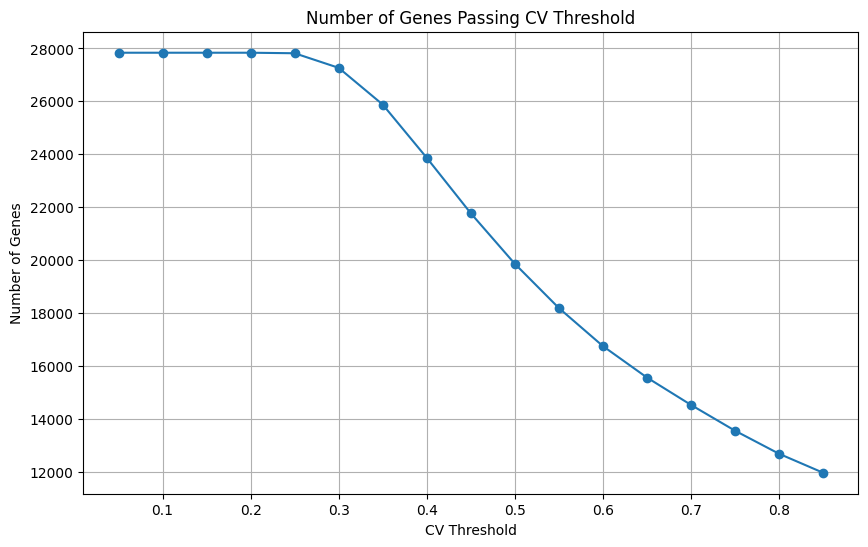

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example data for testing
# filtered_expression_matrix = pd.read_csv("filtered_expression_matrix.csv", index_col=0)
# lsg_list = [...]  # List of LSGs

# Initialize lists to store thresholds and corresponding gene counts
thresholds = []
lsg_gene_counts = []
dynamic_gene_counts = []

# Calculate the coefficient of variation (CV) for each gene
cv_values = filtered_expression_matrix.std(axis=1) / filtered_expression_matrix.mean(axis=1)
goi_set = set(goi_list)

# Define the range of CV thresholds to iterate over
cv_thresholds = np.arange(0.05, 0.90, 0.05)

# Iterate over different CV thresholds
for threshold in cv_thresholds:
    # Select genes with CV values above the threshold
    dynamic_genes = cv_values[cv_values > threshold].index
    dynamic_genes_set = set(dynamic_genes)
    
    # Find the intersection (common elements) between the two sets
    common_elements = goi_set.intersection(dynamic_genes_set)

    # Get the count of common elements
    common_elements_count = len(common_elements)
    dynamic_gene_count = len(dynamic_genes)
    
    # Append the threshold and corresponding gene count to lists
    thresholds.append(threshold)
    lsg_gene_counts.append(common_elements_count)
    dynamic_gene_counts.append(dynamic_gene_count)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, lsg_gene_counts, marker='o', linestyle='-')
plt.title('Number of GOIs Passing CV Threshold')
plt.xlabel('CV Threshold')
plt.ylabel('Number of Genes')
plt.grid(True)
plt.show()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, dynamic_gene_counts, marker='o', linestyle='-')
plt.title('Number of Genes Passing CV Threshold')
plt.xlabel('CV Threshold')
plt.ylabel('Number of Genes')
plt.grid(True)
plt.show()


based on the result you can decide what is a good cutoff, so that your GOI will retain in the study, but also removing enough not-dynamic genes

In [7]:
cv_filter = cv_values > (cv_cutoff/100)
dynamic_expression_matrix = filtered_expression_matrix[cv_filter]

## Exporting the matrix for the next step

transpose the matrix for the WGCNA and then export

In [8]:
dynamic_expression_matrix.T.to_csv(f"data/dynamic_expression_matrix_TPM{tpm_cutoff}_CV{cv_cutoff}_{tissue}.csv")